# Midterm Exam 01

- This is a closed book exam
- You should only ever have a SINGLE browser tab open
- The exam lasts 75 minutes, and Sakai will not accept late submissions
- You may use the following:

    - TAB completion
    - SHIFT-TAB completion for function arguments
    - help(func), `?func`, `func?` to get help on `func`
    
- To create a new cell, use `ESC-A` or `ESC-B`

## Duke Honor Code

By taking this exam, you agree to abide by the Duke Honor Code.

### All necessary imports have been made for you

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools as it
import pandas as pd
from string import punctuation
import re

**1**. (30 points)

- Write a function to find where f(x) crosses zero using a bisection algorithm. The bisection algorithm works in the following way - given the left and right boundary, it checks if the crossing is between left and mid-point, or between the right and mid-point. If the former, the mid-point is set as the new right boundary and so on. In other words the interval containing the crossing is halved at each step. Stop when the length of the interval is less than 1e-6, and return the left and right boundaries at that point.
    - The function should have the signature `bisect(f, left=0, right=1, tol=1e-6)`
    - Use `bisect` to find the left and right intervals containing a zero (root) of the function $x^3 + 4x^2 - 1$ between 0 and 1.
    - <font color=red>Hint</font>: If the crossing is between left and right, the function evaluated at left and right must have opposite signs. (20 points)

- Plot the function together with a horizontal line for $y=0$ and a red circle at the root whose coordinates are (`left`, 0). The x-limits of the plot should be 0 and 1. (10 points)

In [278]:
f = lambda x: x**3+4*x**2-1
def bisect(f, left=0, right=1, tol=1e-6):
    interval=right-left
    while interval>tol:
        midpoint = (right-left)/2 + left
        if (f(left)<0 and f(midpoint)>0) or (f(left)>0 and f(midpoint)<0):
            right=midpoint
        else:
            left=midpoint
        interval=right-left
    return left,right
       
roots=bisect(f)

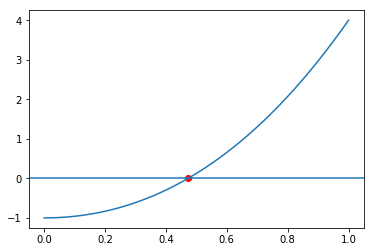

In [280]:
x=np.linspace(0,1,10000)
plt.plot(x,f(x))
plt.axhline(0)
plt.scatter(x=roots[0],y=0, c='Red')

The following question require you to process the following books: `austen-emma.txt`, `austen-persuasion.txt` and `austen-sense.txt` in the `data` folder.

In [2]:
books = ['data/austen-emma.txt',
         'data/austen-persuasion.txt', 
         'data/austen-sense.txt']

**2**. (15 points)

- Write a function to pre-process a string argument by removing punctuation and converting to lower case (5 points)
- Write a function to read in a single text file (given the file path as argument) and return the pre-processed text in that file as a single string (5 points)
- Write a function that takes as argument a list of words and returns a dictionary where the key is a word and the value is the word count. (5 points)

In [46]:
def lowerNoPunc(string):
    """remove punctuation in string and convert string to lower case"""
    string=string.lower().translate(str.maketrans('','',punctuation))
    return string




In [47]:
lowerNoPunc('hello!YouYou')

'helloyouyou'

In [80]:
def textIntoString(filepath):
    """read in single text file and return text as a single string"""
    finalstring=str()
    with open(filepath) as f:
        for line in f:
            finalstring = finalstring + line
    return lowerNoPunc(finalstring)

In [81]:
textIntoString('data/austen-emma.txt')

'emma by jane austen 1816\n\nvolume i\n\nchapter i\n\n\nemma woodhouse handsome clever and rich with a comfortable home\nand happy disposition seemed to unite some of the best blessings\nof existence and had lived nearly twentyone years in the world\nwith very little to distress or vex her\n\nshe was the youngest of the two daughters of a most affectionate\nindulgent father and had in consequence of her sisters marriage\nbeen mistress of his house from a very early period  her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses and her place had been supplied\nby an excellent woman as governess who had fallen little short\nof a mother in affection\n\nsixteen years had miss taylor been in mr woodhouses family\nless as a governess than a friend very fond of both daughters\nbut particularly of emma  between them it was more the intimacy\nof sisters  even before miss taylor had ceased to hold the nominal\noffice of governess the mildness of he

In [50]:
def countwords(lst):
    """return a dictionary where the key is the word in the list, value is the count of the word"""
    return {word:lst.count(word) for word in lst}
    

In [51]:
test=['a','b','b']
countwords(test)

{'a': 1, 'b': 2}

**3** (15 points)

- Create a dictionary where the keys are the book titles and the values are the pre-processed text of each book (5 point)
- Create a dictionary where the keys are the book titles and the values are all the words (including repetitions) in each book, where a word is any token split by white space after pre-processing (5 points)
- Create a vocabulary of unique words (combining all words from the 3 books) and print the 3 most common words and their counts (5 points)

In [82]:
#create a dictionary where keys are book titles and values are pre-processed text of each book
bookTextDict = {bookpath.split('-')[1].split('.')[0]:textIntoString(bookpath) for bookpath in books}
bookTextDict

{'emma': 'emma by jane austen 1816\n\nvolume i\n\nchapter i\n\n\nemma woodhouse handsome clever and rich with a comfortable home\nand happy disposition seemed to unite some of the best blessings\nof existence and had lived nearly twentyone years in the world\nwith very little to distress or vex her\n\nshe was the youngest of the two daughters of a most affectionate\nindulgent father and had in consequence of her sisters marriage\nbeen mistress of his house from a very early period  her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses and her place had been supplied\nby an excellent woman as governess who had fallen little short\nof a mother in affection\n\nsixteen years had miss taylor been in mr woodhouses family\nless as a governess than a friend very fond of both daughters\nbut particularly of emma  between them it was more the intimacy\nof sisters  even before miss taylor had ceased to hold the nominal\noffice of governess the mildn

In [83]:
#create a word dictionary where keys are book titles and values are words in that book
wordDict = {title: text.split() for title,text in bookTextDict.items()}

wordDict

{'emma': ['emma',
  'by',
  'jane',
  'austen',
  '1816',
  'volume',
  'i',
  'chapter',
  'i',
  'emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twentyone',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  'she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sisters',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  'her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an'

In [284]:
#create a list of vocabulary for all books
vocab = [word for words in wordDict.values() for word in words]
vocab 
counts = countwords(vocab)
print(sorted(counts.items(), key=lambda x: x[1], reverse=True))




KeyboardInterrupt: 

In [99]:
test=['emma','emma']
countwords(test)

{'emma': 2}

**4** (15 points)

- Create a data frame where the rows are unique words, the columns are books, and the cells are counts of each word in each book (15 points)

Note: It is ok if some entries are NaN for now.

In [231]:
uniquevocablen=len(vocab)
vocabdf=np.zeros((uniquevocablen,3))
bookwordlist=list(wordDict.values())

for i, word in enumerate(vocab):
    for j, wordlist in enumerate(bookwordlist):
        vocabdf[i,j]=wordlist.count(word)

  


In [239]:
vocabdf=pd.DataFrame(vocabdf) 
vocabdf.index=vocab
vocabdf.columns=['emma','persuation','sense']
vocabdf

,emma,persuation,sense
hemmed,0.0,1.0,0.0
uponfor,0.0,0.0,1.0
rudebut,1.0,0.0,0.0
presided,0.0,0.0,1.0
martinshe,1.0,0.0,0.0
hesitated,3.0,2.0,3.0
outcry,1.0,0.0,0.0
wont,0.0,1.0,14.0
mr,1124.0,255.0,178.0
elucidation,0.0,0.0,1.0


<font color=red>Note: </font>If you are not able to create the data frame, use this one `data/bag_of_words.csv` 

**5**. (15 points)

- Display the 5 rows with the largest row minimums (5 points)
- Drop all rows where the count in ANY column is 0, and report the number of rows left (5 points)
- Normalize the data frame so that each row sums to 1 - i.e. each cell contains the relative fraction of the row word across the 3 books (5 points)

In [281]:
wordsdf=pd.read_csv('data/bag_of_words.csv', index_col=0)
wordsdfnew=wordsdf
wordsdfnew

,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt
1,NaN,3.0,2.0
10,NaN,1.0,1.0
10000,2.0,NaN,NaN
11,NaN,1.0,1.0
12,NaN,1.0,1.0
13,NaN,1.0,1.0
14,NaN,1.0,1.0
15,NaN,2.0,1.0
16,NaN,2.0,1.0
17,NaN,1.0,1.0


In [193]:
wordsdfnew=wordsdfnew.fillna(0)
wordsdfnew['rowmin'] = wordsdfnew.agg('min', axis=1)
wordsdfnew=wordsdfnew.sort_values(by=['rowmin'], ascending=False)
wordsdfnew.head(5)




,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt,rowmin
the,5146.0,3326.0,4087.0,3326.0
and,4613.0,2782.0,3399.0,2782.0
to,5149.0,2782.0,4086.0,2782.0
of,4274.0,2568.0,3569.0,2568.0
a,3073.0,1591.0,2047.0,1591.0


In [191]:
#drop all rows where any column is 0
wordsdfnew.drop(wordsdfnew[wordsdfnew.rowmin==0].index,axis=0)

,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt,rowmin
the,5146.0,3326.0,4087.0,3326.0
to,5149.0,2782.0,4086.0,2782.0
and,4613.0,2782.0,3399.0,2782.0
of,4274.0,2568.0,3569.0,2568.0
a,3073.0,1591.0,2047.0,1591.0
in,2147.0,1382.0,1930.0,1382.0
was,2376.0,1336.0,1845.0,1336.0
her,2417.0,1202.0,2514.0,1202.0
she,2278.0,1143.0,1573.0,1143.0
i,2968.0,1117.0,1923.0,1117.0


In [214]:
#normalize each row so that they sum to one
wordsdfnew3 = wordsdfnew.drop(columns=['rowmin'])
wordsdfnew3['sum']=wordsdfnew3.agg('sum',axis=1)
wordsdfnew3.iloc[:,0]=wordsdfnew3.iloc[:,0]/wordsdfnew3['sum']
wordsdfnew3.iloc[:,1]=wordsdfnew3.iloc[:,0]/wordsdfnew3['sum']
wordsdfnew3.iloc[:,2]=wordsdfnew3.iloc[:,0]/wordsdfnew3['sum']
wordsdfnew3

,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt,sum
the,0.409746,0.000033,0.000033,12559.0
and,0.427367,0.000040,0.000040,10794.0
to,0.428476,0.000036,0.000036,12017.0
of,0.410527,0.000039,0.000039,10411.0
a,0.457905,0.000068,0.000068,6711.0
in,0.393295,0.000072,0.000072,5459.0
was,0.427569,0.000077,0.000077,5557.0
her,0.394098,0.000064,0.000064,6133.0
she,0.456147,0.000091,0.000091,4994.0
i,0.494008,0.000082,0.000082,6008.0


**6**. (10 points)

- Use a regular expression to extract only rows with words that contain 3 or more vowels (5 points)
- Save the data frame as a CSV file in the `data` folder - the CSV file should have the following columns (`word`, `austen-emma.txt`, `austen-persuasion.txt`, and `austen-sense.txt`). Run `!head data/vowel_rich.txt` to check that the CSV file looks like you expect it to. (5 points)

In [166]:
wordsdf[wordsdf.index.str.contains(r'[aeiou]{3,}')]
wordsdf['word']=wordsdf.index
wordsdf.columns=['austen-emma.txt','austen-persuasion.txt','austen-sense.txt','words']
wordsdf.to_csv('data/vowel_rich.txt')



In [167]:
!head data/vowel_rich.txt

,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,words
1,0.0,3.0,2.0,1
10,0.0,1.0,1.0,10
10000,2.0,0.0,0.0,10000
11,0.0,1.0,1.0,11
12,0.0,1.0,1.0,12
13,0.0,1.0,1.0,13
14,0.0,1.0,1.0,14
15,0.0,2.0,1.0,15
16,0.0,2.0,1.0,16
